# Plot the Graph for the total number of issues with different labels created and closed on every date on GitHub for SPM587SP22 issues project

### Example of Issue Form Filled out

### Data Set File:  SPM587SP22issues.json

In [1]:
import os

import warnings
warnings.filterwarnings('ignore')

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

%matplotlib inline



# Requirement : Get the total number of issues with different labels for every date and plot them in a stacked chart

In [2]:
# Read the JSON file into a list of dictionaries

import json
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587SP22issues.json')]

In [3]:
# Create the DataFrame object for the list_of_issues_dict_data object

issues_df = DataFrame(list_of_issues_dict_data)

In [4]:
# Sanity test: print rows in our DataFrame

issues_df
    

,issue_number,created_at,closed_at,labels,State,Author
0,125,2022-03-02,None,"[Status: Completed, Priority: High, Originatio...",open,SPM587SP22
1,124,2022-03-02,None,"[Priority: Major, Status: Approved, Originatio...",open,SPM587SP22
2,123,2022-03-02,None,"[Priority: Major, Status: inProgress, Originat...",open,SPM587SP22
3,122,2022-03-02,None,"[Priority: Major, Status: Completed, Originati...",open,SPM587SP22
4,121,2022-03-02,None,"[Priority: Major, Status: Completed, Originati...",open,SPM587SP22
...,...,...,...,...,...,...
120,5,2022-02-20,None,"[Priority: Low, Status: pendingReview, Origina...",open,SPM587SP22
121,4,2022-02-20,None,"[Status: inProgress, Priority: High, Originati...",open,SPM587SP22
122,3,2022-02-20,2022-02-24,"[Priority: Critical, Status: Completed, Origin...",closed,SPM587SP22
123,2,2022-02-20,2022-02-22,"[Priority: Major, Status: Rejected, Originatio...",closed,SPM587SP22


In [5]:
# Prepare and Clean the dataframe object

wrangled_issues_df = issues_df[['Author','State','closed_at','created_at','issue_number','labels']]
wrangled_issues_df.loc[0:len(wrangled_issues_df), 'OriginationPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'DetectionPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Category']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Priority']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Status']= np.NaN


In [6]:
wrangled_issues_df

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status
0,SPM587SP22,open,None,2022-03-02,125,"[Status: Completed, Priority: High, Originatio...",NaN,NaN,NaN,NaN,NaN
1,SPM587SP22,open,None,2022-03-02,124,"[Priority: Major, Status: Approved, Originatio...",NaN,NaN,NaN,NaN,NaN
2,SPM587SP22,open,None,2022-03-02,123,"[Priority: Major, Status: inProgress, Originat...",NaN,NaN,NaN,NaN,NaN
3,SPM587SP22,open,None,2022-03-02,122,"[Priority: Major, Status: Completed, Originati...",NaN,NaN,NaN,NaN,NaN
4,SPM587SP22,open,None,2022-03-02,121,"[Priority: Major, Status: Completed, Originati...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
120,SPM587SP22,open,None,2022-02-20,5,"[Priority: Low, Status: pendingReview, Origina...",NaN,NaN,NaN,NaN,NaN
121,SPM587SP22,open,None,2022-02-20,4,"[Status: inProgress, Priority: High, Originati...",NaN,NaN,NaN,NaN,NaN
122,SPM587SP22,closed,2022-02-24,2022-02-20,3,"[Priority: Critical, Status: Completed, Origin...",NaN,NaN,NaN,NaN,NaN
123,SPM587SP22,closed,2022-02-22,2022-02-20,2,"[Priority: Major, Status: Rejected, Originatio...",NaN,NaN,NaN,NaN,NaN


In [7]:
for i in range(0, len(wrangled_issues_df)):
    if wrangled_issues_df.iloc[i]['labels']:
        for label in wrangled_issues_df.iloc[i]['labels']:
            if len(label.split(':')) == 2:
                label_name= (label.split(':'))[0]
                label_value= (label.split(':'))[1]
                wrangled_issues_df.loc[i, label_name]=label_value
 

In [8]:
wrangled_issues_df

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status
0,SPM587SP22,open,None,2022-03-02,125,"[Status: Completed, Priority: High, Originatio...",Requirements,Design,Inquiry,High,Completed
1,SPM587SP22,open,None,2022-03-02,124,"[Priority: Major, Status: Approved, Originatio...",Testing,Coding,Bug,Major,Approved
2,SPM587SP22,open,None,2022-03-02,123,"[Priority: Major, Status: inProgress, Originat...",Design,Coding,Bug,Major,inProgress
3,SPM587SP22,open,None,2022-03-02,122,"[Priority: Major, Status: Completed, Originati...",Documentation,Design,Bug,Major,Completed
4,SPM587SP22,open,None,2022-03-02,121,"[Priority: Major, Status: Completed, Originati...",Documentation,Design,Enhancement,Major,Completed
...,...,...,...,...,...,...,...,...,...,...,...
120,SPM587SP22,open,None,2022-02-20,5,"[Priority: Low, Status: pendingReview, Origina...",Field,Field,Inquiry,Low,pendingReview
121,SPM587SP22,open,None,2022-02-20,4,"[Status: inProgress, Priority: High, Originati...",Requirements,Requirements,Enhancement,High,inProgress
122,SPM587SP22,closed,2022-02-24,2022-02-20,3,"[Priority: Critical, Status: Completed, Origin...",Documentation,Coding,Bug,Critical,Completed
123,SPM587SP22,closed,2022-02-22,2022-02-20,2,"[Priority: Major, Status: Rejected, Originatio...",Field,Field,Inquiry,Major,Rejected


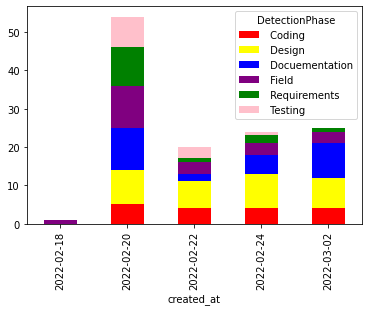

In [14]:
# Plot in Bar Chart the total number of issues created every day for every Detection Phase

LabelsReviewedByDate = wrangled_issues_df.groupby(['created_at','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red', 'yellow', 'blue', 'purple', 'green', 'pink'], grid=False)

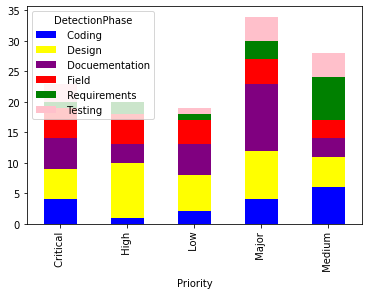

In [15]:
# Plot in Bar Chart the total number of issues created for every Phase based on their priorites

LabelsReviewedByDate = wrangled_issues_df.groupby(['Priority','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green', 'pink'], grid=False)

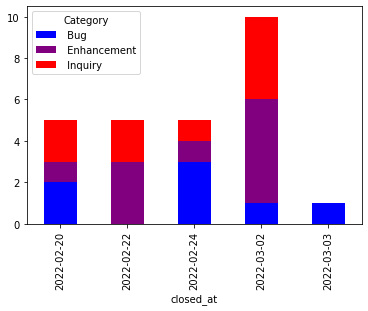

In [16]:
# Plot in Bar Chart the total number of issues closed every day for every Category

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','Category']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red', 'yellow', 'green', 'pink'], grid=False)

#  Requirement #1: Plot in Bar Chart the total number of issues closed every day for every Origination Phase

In [12]:
# Requirement #1: Add your code here



#  Requirement #2: # Plot in Bar Chart the total number of issues created for every Phase based on their Status

In [13]:
# Requirement #2: Add your code here

